In [1]:
import os
N_THREADS = str(8)
os.environ["MKL_NUM_THREADS"] = N_THREADS
os.environ["MKL_NUM_cpus"] = N_THREADS
os.environ["OMP_NUM_THREADS"] = N_THREADS
os.environ["OMP_NUM_cpus"] = N_THREADS
os.environ["OPENBLAS_NUM_THREADS"] = N_THREADS
os.environ["OPENBLAS_NUM_cpus"] = N_THREADS          

In [2]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd

/home/sturm/.conda/envs/scirpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
paths_transcriptomics = sorted(glob("/data/projects/2020/covid19/processed/GSE145926/*.h5"))
paths_vdj = sorted(glob("/data/projects/2020/covid19/processed/GSE145926/*.csv.gz"))

In [4]:
samples = {
    "C141": {
        "group": "mild"
    },
    "C142" : {
        "group": "mild"
    },
    "C143": {
        "group": "severe"
    },
    "C144": {
        "group": "mild"
    },
    "C145": {
        "group": "severe"
    },
    "C146": {
        "group": "severe"
    },
    "C148": {
        "group": "healthy control"
    },
    "C149": {
        "group": "healthy control"
    },
    "C152": {
        "group": "healthy control"
    },
}

In [5]:
adatas = []
for sample, sample_meta in samples.items():
    glob_gex = glob(f"/data/projects/2020/covid19/processed/GSE145926/*{sample}*.h5")
    glob_tcr = glob(f"/data/projects/2020/covid19/processed/GSE145926/*{sample}*.csv.gz")
    adata = sc.read_10x_h5(glob_gex[0])
    adata
    adata_tcr = ir.read_10x_vdj(glob_tcr[0])
    ir.pp.merge_with_tcr(adata, adata_tcr)
    adata.obs = adata.obs.assign(**sample_meta)
    adatas.append(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_junction_ins' as categorical
... storing 'TRA_2_junction_ins' as categorical
... storing 'TRB_1_junction_ins' as categorical
... storing 'TRB_2_junction_ins' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j

In [6]:
adata = adatas[0].concatenate(adatas[1:])

Making variable names unique for controlled concatenation.


In [7]:
adata

AnnData object with n_obs × n_vars = 77777 × 33539 
    obs: 'TRA_1_c_gene', 'TRA_1_cdr3', 'TRA_1_cdr3_nt', 'TRA_1_d_gene', 'TRA_1_expr', 'TRA_1_j_gene', 'TRA_1_junction_ins', 'TRA_1_v_gene', 'TRA_2_c_gene', 'TRA_2_cdr3', 'TRA_2_cdr3_nt', 'TRA_2_d_gene', 'TRA_2_expr', 'TRA_2_j_gene', 'TRA_2_junction_ins', 'TRA_2_v_gene', 'TRB_1_c_gene', 'TRB_1_cdr3', 'TRB_1_cdr3_nt', 'TRB_1_d_gene', 'TRB_1_expr', 'TRB_1_j_gene', 'TRB_1_junction_ins', 'TRB_1_v_gene', 'TRB_2_c_gene', 'TRB_2_cdr3', 'TRB_2_cdr3_nt', 'TRB_2_d_gene', 'TRB_2_expr', 'TRB_2_j_gene', 'TRB_2_junction_ins', 'TRB_2_v_gene', 'batch', 'group', 'has_tcr', 'multi_chain'
    var: 'gene_ids', 'feature_types', 'genome'

In [8]:
adata.var_names_make_unique()

In [9]:
adata = adata[adata.obs["has_tcr"] == True, :].copy()

In [10]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=200)

In [11]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)

In [12]:
adata

AnnData object with n_obs × n_vars = 6067 × 15469 
    obs: 'TRA_1_c_gene', 'TRA_1_cdr3', 'TRA_1_cdr3_nt', 'TRA_1_d_gene', 'TRA_1_expr', 'TRA_1_j_gene', 'TRA_1_junction_ins', 'TRA_1_v_gene', 'TRA_2_c_gene', 'TRA_2_cdr3', 'TRA_2_cdr3_nt', 'TRA_2_d_gene', 'TRA_2_expr', 'TRA_2_j_gene', 'TRA_2_junction_ins', 'TRA_2_v_gene', 'TRB_1_c_gene', 'TRB_1_cdr3', 'TRB_1_cdr3_nt', 'TRB_1_d_gene', 'TRB_1_expr', 'TRB_1_j_gene', 'TRB_1_junction_ins', 'TRB_1_v_gene', 'TRB_2_c_gene', 'TRB_2_cdr3', 'TRB_2_cdr3_nt', 'TRB_2_d_gene', 'TRB_2_expr', 'TRB_2_j_gene', 'TRB_2_junction_ins', 'TRB_2_v_gene', 'batch', 'group', 'has_tcr', 'multi_chain', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p'

In [13]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=3000, batch_key="batch")

... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_1_cdr3_nt' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRA_2_cdr3_nt' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_1_cdr3_nt' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_c_gene' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRB_2_cdr3_nt' as categorical
... storing 'TRB_2_expr' as categorical
... storing 'TRB_2_j_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'group' as categorical
... storing 'has_tcr' as categorical
... storing 'multi_chain' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [14]:
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)

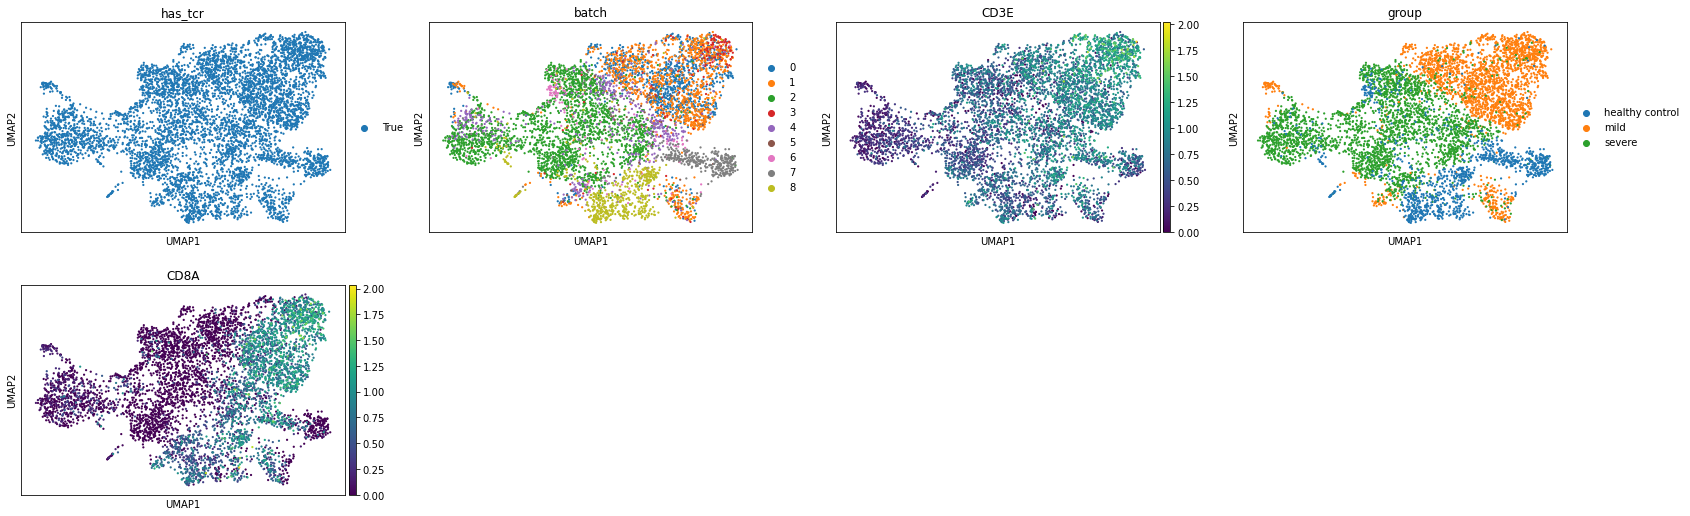

In [15]:
sc.pl.umap(adata, color=["has_tcr", "batch", "CD3E", "group", "CD8A"])

In [16]:
adata2 = adata.copy()

In [17]:
sc.pp.combat(adata2)

/home/sturm/.conda/envs/scirpy/lib/python3.7/site-packages/scanpy/preprocessing/_combat.py:338: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


In [18]:
sc.pp.pca(adata2, svd_solver="arpack")
sc.pp.neighbors(adata2)
sc.tl.umap(adata2)

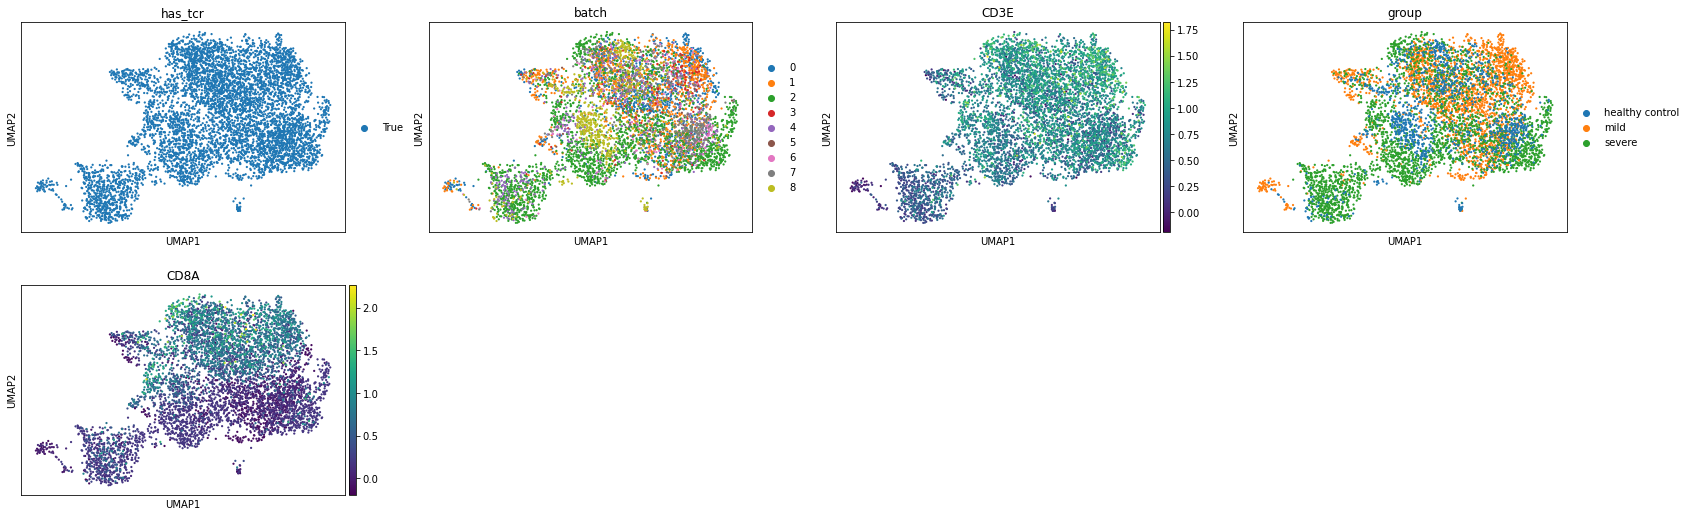

In [19]:
sc.pl.umap(adata2, color=["has_tcr", "batch", "CD3E", "group", "CD8A"])

In [20]:
adata_bk = adata.copy()

In [21]:
ir.tl.chain_pairing(adata)

... storing 'chain_pairing' as categorical


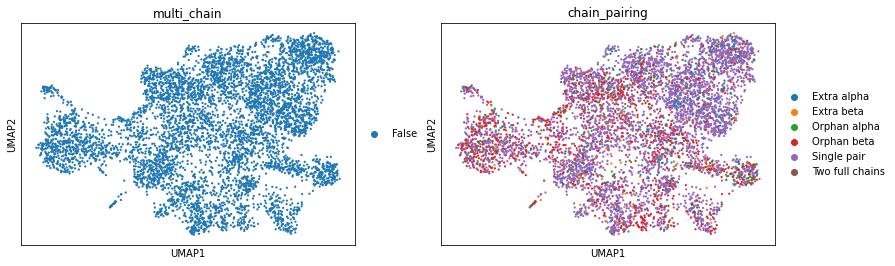

In [22]:
sc.pl.umap(adata, color=["multi_chain", "chain_pairing"])

## Define clonotypes

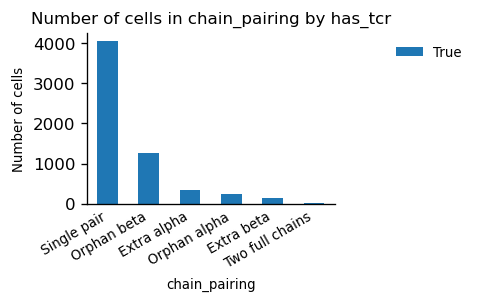

In [31]:
ir.pl.group_abundance(adata, "chain_pairing")

In [33]:
adata = adata[~adata.obs["chain_pairing"].str.startswith("Orphan"), :].copy()

In [34]:
ir.pp.tcr_neighbors(adata, cutoff=0, receptor_arms="all", dual_tcr="primary_only", sequence="nt", key_added="tcr_neighbors_nt")
ir.tl.define_clonotypes(adata, partitions="connected", neighbors_key="tcr_neighbors_nt", key_added="clonotype_nt")

In [35]:
ir.pp.tcr_neighbors(adata, cutoff=0, receptor_arms="all", dual_tcr="primary_only", key_added="tcr_neighbors_aa")
ir.tl.define_clonotypes(adata, neighbors_key="tcr_neighbors_aa", key_added="clonotype_aa")

In [36]:
ir.pp.tcr_neighbors(adata, cutoff=15, receptor_arms="all", dual_tcr="all", key_added="tcr_neighbors_blosum")
ir.tl.define_clonotypes(adata, partitions="connected", neighbors_key="tcr_neighbors_blosum", key_added="clonotype_blosum")

100%|██████████| 3008/3008 [00:07<00:00, 423.63it/s]


In [37]:
ir.tl.clonotype_network(adata, min_size=3, layout="components", neighbors_key="tcr_neighbors_blosum",
                        key_clonotype_size="clonotype_blosum_size")

... storing 'clonotype_nt' as categorical
... storing 'clonotype_aa' as categorical
... storing 'clonotype_blosum' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3ef9e5750>,
      dtype=object)

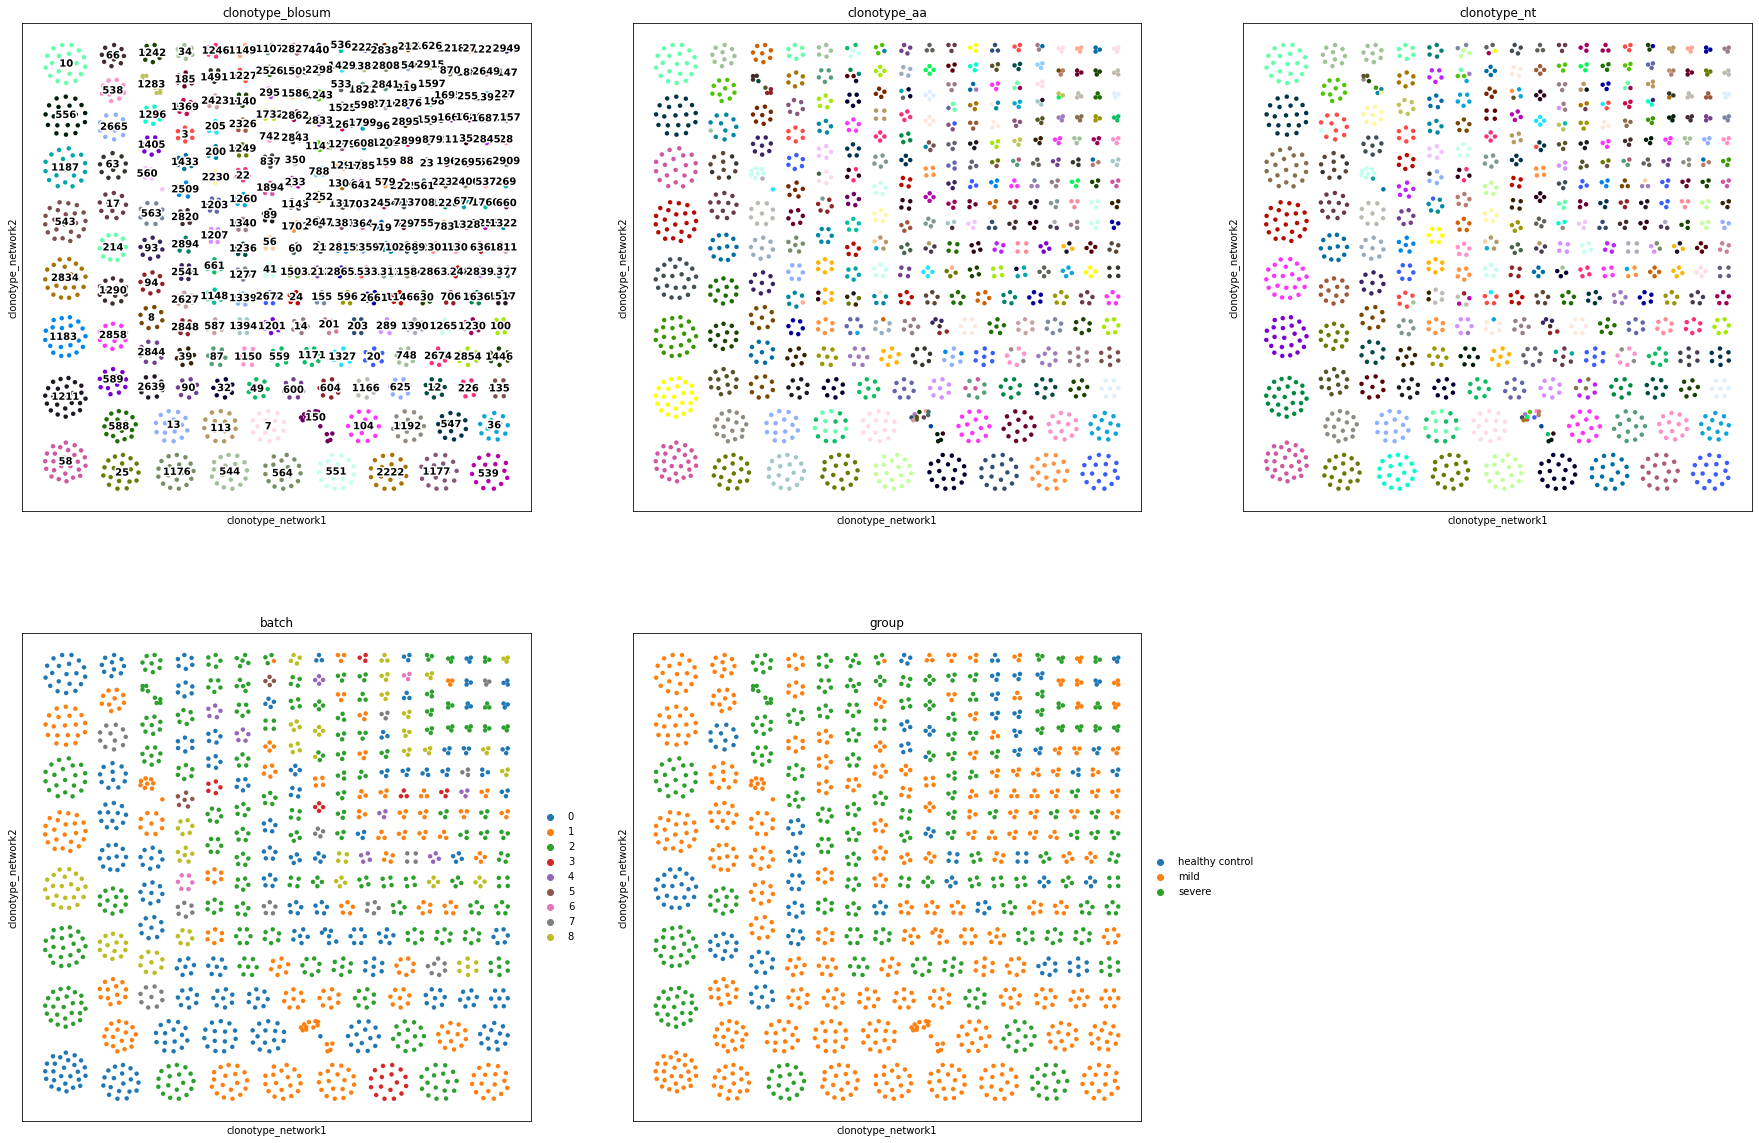

In [38]:
ir.pl.clonotype_network(adata, color=["clonotype_blosum", "clonotype_aa", "clonotype_nt", "batch", "group"],
                        legend_loc=["on data", "none", "none", "right margin", "right margin"], legend_fontoutline=3, size=80, edges=False)

In [48]:
def find_convergence(adata, key_coarse, key_fine):
    # first, make sure that there are not more than one of key_coarse in each key_fine (consistency check)
#     def _check(df, key):
#         """Check that all entries of key are identical"""
#         if df[key].unique().size != 1:
#             print(df[key])
#             raise ValueError("At least one of `key_fine` contains multiple `key_coarse`. ")
            
#     adata.obs.groupby(key_fine).apply(lambda X: _check(X, key_coarse))
    
    return adata.obs.loc[:, [key_coarse, key_fine]].groupby(key_coarse).apply(lambda X: X[key_fine].unique().size)

In [49]:
find_convergence(adata, "clonotype_aa", "clonotype_nt")

clonotype_aa
0       1
1       1
2       1
3       1
4       1
       ..
3025    1
3026    1
3027    1
3028    1
3029    1
Length: 3030, dtype: int64

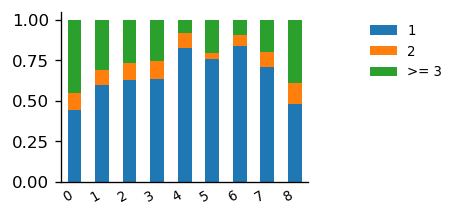

In [52]:
ir.pl.clonal_expansion(adata, "batch")

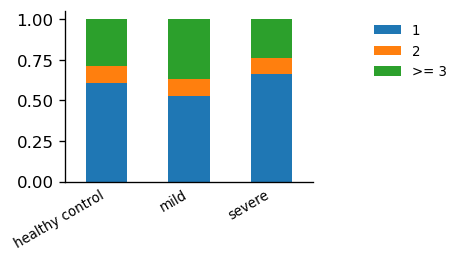

In [48]:
ir.pl.clonal_expansion(adata, "group")